## Redid

#### First attempt has mixed clusters because of imputing mode in categorical variables
[1st Attempt](Ship_Performance\model.ipynb)

## Basic EDA 

In [26]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [27]:

data = pd.read_csv('Ship_Performance_Dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     2736 non-null   object 
 1   Ship_Type                2600 non-null   object 
 2   Route_Type               2600 non-null   object 
 3   Engine_Type              2600 non-null   object 
 4   Maintenance_Status       2600 non-null   object 
 5   Speed_Over_Ground_knots  2736 non-null   float64
 6   Engine_Power_kW          2736 non-null   float64
 7   Distance_Traveled_nm     2736 non-null   float64
 8   Draft_meters             2736 non-null   float64
 9   Weather_Condition        2600 non-null   object 
 10  Cargo_Weight_tons        2736 non-null   float64
 11  Operational_Cost_USD     2736 non-null   float64
 12  Revenue_per_Voyage_USD   2736 non-null   float64
 13  Turnaround_Time_hours    2736 non-null   float64
 14  Efficiency_nm_per_kWh   

In [28]:
data[data.duplicated()] 

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage


In [29]:
data.dropna(inplace=True)

In [30]:
data.isnull().sum()

Date                       0
Ship_Type                  0
Route_Type                 0
Engine_Type                0
Maintenance_Status         0
Speed_Over_Ground_knots    0
Engine_Power_kW            0
Distance_Traveled_nm       0
Draft_meters               0
Weather_Condition          0
Cargo_Weight_tons          0
Operational_Cost_USD       0
Revenue_per_Voyage_USD     0
Turnaround_Time_hours      0
Efficiency_nm_per_kWh      0
Seasonal_Impact_Score      0
Weekly_Voyage_Count        0
Average_Load_Percentage    0
dtype: int64

## Encoding

### Detecting nominal and ordinal cols

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2127 entries, 1 to 2735
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     2127 non-null   object 
 1   Ship_Type                2127 non-null   object 
 2   Route_Type               2127 non-null   object 
 3   Engine_Type              2127 non-null   object 
 4   Maintenance_Status       2127 non-null   object 
 5   Speed_Over_Ground_knots  2127 non-null   float64
 6   Engine_Power_kW          2127 non-null   float64
 7   Distance_Traveled_nm     2127 non-null   float64
 8   Draft_meters             2127 non-null   float64
 9   Weather_Condition        2127 non-null   object 
 10  Cargo_Weight_tons        2127 non-null   float64
 11  Operational_Cost_USD     2127 non-null   float64
 12  Revenue_per_Voyage_USD   2127 non-null   float64
 13  Turnaround_Time_hours    2127 non-null   float64
 14  Efficiency_nm_per_kWh    2127

In [31]:
ordinal_map = {'Critical': 0, 'Fair': 1, 'Good': 2}
data['Maintenance_Status'] = data['Maintenance_Status'].map(ordinal_map)


In [32]:

label_cols = ['Ship_Type', 'Route_Type', 'Engine_Type', 'Weather_Condition']  # example
for col in label_cols:
    data[col] = LabelEncoder().fit_transform(data[col])


In [33]:
selected_features = [
    'Operational_Cost_USD',
    'Revenue_per_Voyage_USD',
    'Efficiency_nm_per_kWh',
    'Engine_Power_kW',
    'Cargo_Weight_tons',
    'Average_Load_Percentage',
    'Turnaround_Time_hours',
    'Distance_Traveled_nm',
    'Maintenance_Status',
    'Route_Type',           
    'Engine_Type'               
]



## Scaling

In [22]:
# k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df_pca)
kmeans_score = silhouette_score(df_pca, kmeans_labels)
print(f"K-Means Score: {kmeans_score:.2f}")

K-Means Score: 0.34


In [ ]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[selected_features])


## Forming clusters

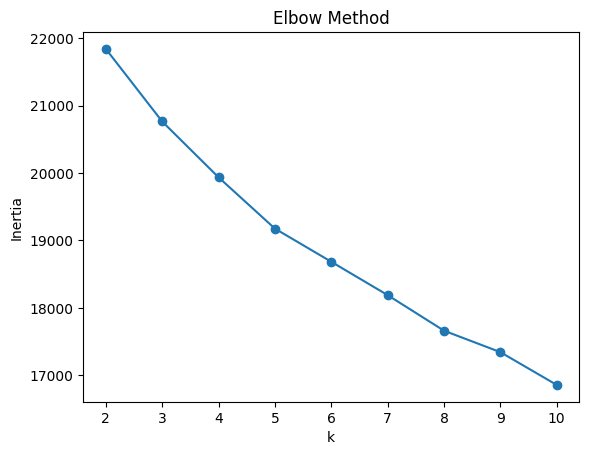

Silhouette Score for k=2: 0.0661
Silhouette Score for k=3: 0.0594
Silhouette Score for k=4: 0.0607
Silhouette Score for k=5: 0.0634
Silhouette Score for k=6: 0.0618
Silhouette Score for k=7: 0.0630
Silhouette Score for k=8: 0.0664
Silhouette Score for k=9: 0.0658
Silhouette Score for k=10: 0.0680


In [35]:

inertias = []
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Elbow Plot
plt.plot(range(2, 11), inertias, marker='o')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Silhouette Scores
for i, score in enumerate(silhouette_scores, start=2):
    print(f'Silhouette Score for k={i}: {score:.4f}')


In [43]:
optimal_k = 3 # replace with what you choose
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)
    

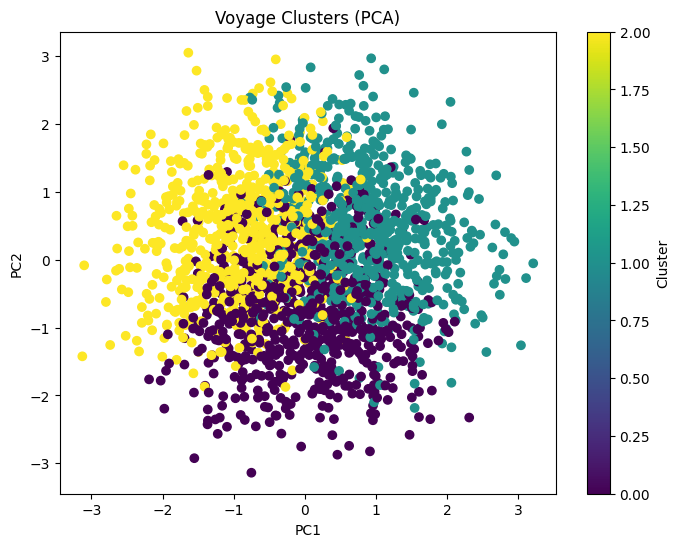

In [44]:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Cluster'], cmap='viridis')
plt.title('Voyage Clusters (PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.show()


In [45]:
cluster_summary = data.groupby('Cluster')[selected_features].mean().round(2)
print(cluster_summary)


         Operational_Cost_USD  Revenue_per_Voyage_USD  Efficiency_nm_per_kWh  \
Cluster                                                                        
0                   228707.73               495509.36                   0.75   
1                   302886.60               518758.12                   0.92   
2                   243849.85               558687.06                   0.70   

         Engine_Power_kW  Cargo_Weight_tons  Average_Load_Percentage  \
Cluster                                                                
0                1911.25            1128.01                    78.29   
1                1261.99             949.37                    70.68   
2                2047.87            1010.80                    75.95   

         Turnaround_Time_hours  Distance_Traveled_nm  Maintenance_Status  \
Cluster                                                                    
0                        38.65                524.47                0.86   
1         

## Cluster insights
Cluster 0 – Efficient short-haul voyages with high cargo utilization and low operational cost. Should be used as a model for optimization.

Cluster 1 – Costly and underperforming voyages with poor load efficiency and maintenance issues. Consider route redesign or ship upgrades.

Cluster 2 – High-revenue long-haul voyages with low efficiency but quick turnaround. Focus on improving fuel efficiency to maximize profit.


## Section: Business Recommendations

Replicate Cluster 0 strategies for other routes.

Re-evaluate or restructure Cluster 1 voyages.

Optimize engine and fuel use in Cluster 2 for maximum profitability.

Improve maintenance protocols to avoid Cluster 1 inefficiencies.